# Correlation Analysis

**Exercise**:

Download the daily stock price of four or five randomly selected stocks from very different sectors or industries for the last 6 months. (Each of these stocks should have been taken from different industry sectors.)

*   Find out the outlier events (date and the gain or loss) for each of these
stocks based on box plot analysis.
* Find out the correlation of daily gains of each of these stocks.
* Draw the scatter plots and the heatmap.

## 1. Datasets 

We will use the following real world data for this notebook.

https://www.bseindia.com/markets/equity/EQReports/StockPrcHistori.html?flag=0

- Daily movement of stocks.
    - ACC Cement (Construction)
    - Cipla (Pharma)
    - Infosys (Tech)
    - ITC (FMCG)
    - Reliance (Petro, Retail and entertainment)
    
- For the period of **01 September 2022 to 22 March 2023**
- The dails stock price data can be downloaded from **BSE India Site**

https://www.bseindia.com/indices/IndexArchiveData.html

## 2. Find out the outlier events (date and the gain or loss) for each of these stocks based on box plot analysis.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [3]:
DATA_PATH = 'https://raw.githubusercontent.com/shivdeepnv/MachineLearningWithPython/main/Session_2/'

In [4]:
acc_df = pd.read_csv(DATA_PATH+"ACC_500410.csv", index_col=False, parse_dates=['Date'])

In [5]:
acc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       140 non-null    datetime64[ns]
 1   Open Price                 140 non-null    float64       
 2   High Price                 140 non-null    float64       
 3   Low Price                  140 non-null    float64       
 4   Close Price                140 non-null    float64       
 5   WAP                        140 non-null    float64       
 6   No.of Shares               140 non-null    int64         
 7   No. of Trades              140 non-null    int64         
 8   Total Turnover (Rs.)       140 non-null    float64       
 9   Deliverable Quantity       140 non-null    int64         
 10  % Deli. Qty to Traded Qty  140 non-null    float64       
 11  Spread High-Low            140 non-null    float64       
 12  Spread C

In [6]:
acc_df = acc_df.set_index('Date', drop=True)

In [7]:
acc_df.sort_index(ascending = True, inplace=True)

In [8]:
acc_df = acc_df[['Close Price', 'Open Price']]

In [9]:
acc_df

,Close Price,Open Price
Date,,
2022-09-01,2297.20,2301.00
2022-09-02,2288.55,2297.50
2022-09-05,2288.40,2296.00
2022-09-06,2336.20,2292.15
2022-09-07,2406.20,2320.10
...,...,...
2023-03-16,1753.15,1740.40
2023-03-17,1728.80,1775.00
2023-03-20,1697.05,1724.00


### 2.a. Calculating daily gains

In [10]:
acc_df["gain"] = ((acc_df['Close Price'] - acc_df['Open Price']) * 100 / acc_df['Open Price'])

In [11]:
acc_df.head( 5 )

,Close Price,Open Price,gain
Date,,,
2022-09-01,2297.20,2301.00,-0.165146
2022-09-02,2288.55,2297.50,-0.389554
2022-09-05,2288.40,2296.00,-0.331010
2022-09-06,2336.20,2292.15,1.921776
2022-09-07,2406.20,2320.10,3.711047


Calculate the gains for other stocks


---



Cipla

In [12]:
DATA_PATH = 'https://raw.githubusercontent.com/shivdeepnv/MachineLearningWithPython/main/Session_2/'
cipla_df = pd.read_csv(DATA_PATH+"Cipla_500087.csv", index_col=False, parse_dates=['Date'])

In [13]:
cipla_df = cipla_df.set_index('Date', drop=True)
cipla_df.sort_index(ascending = True, inplace=True)
cipla_df = cipla_df[['Close Price', 'Open Price']]
cipla_df["gain"] = ((cipla_df['Close Price'] - cipla_df['Open Price']) * 100 / cipla_df['Open Price'])
cipla_df.head( 5 )

,Close Price,Open Price,gain
Date,,,
2022-09-01,1022.80,1031.30,-0.824202
2022-09-02,1015.55,1022.80,-0.708838
2022-09-05,1025.70,1021.45,0.416075
2022-09-06,1040.70,1025.65,1.467362
2022-09-07,1050.60,1038.10,1.204123


Infosys

In [14]:
infy_df = pd.read_csv(DATA_PATH+"Infy_500209.csv", index_col=False, parse_dates=['Date'])
infy_df = infy_df.set_index('Date', drop=True)
infy_df.sort_index(ascending = True, inplace=True)
infy_df = infy_df[['Close Price', 'Open Price']]
infy_df["gain"] = ((infy_df['Close Price'] - infy_df['Open Price']) * 100 / infy_df['Open Price'])
infy_df.head( 5 )

,Close Price,Open Price,gain
Date,,,
2022-09-01,1464.40,1465.00,-0.040956
2022-09-02,1452.90,1480.00,-1.831081
2022-09-05,1460.85,1451.00,0.678842
2022-09-06,1455.35,1461.55,-0.424207
2022-09-07,1457.80,1442.00,1.095700


ITC

In [15]:
itc_df = pd.read_csv(DATA_PATH+"ITC_500875.csv", index_col=False, parse_dates=['Date'])
itc_df = itc_df.set_index('Date', drop=True)
itc_df.sort_index(ascending = True, inplace=True)
itc_df = itc_df[['Close Price', 'Open Price']]
itc_df["gain"] = ((itc_df['Close Price'] - itc_df['Open Price']) * 100 / itc_df['Open Price'])
itc_df.head( 5 )

,Close Price,Open Price,gain
Date,,,
2022-09-01,317.55,319.30,-0.548074
2022-09-02,323.00,318.20,1.508485
2022-09-05,328.75,324.40,1.340937
2022-09-06,327.15,329.65,-0.758380
2022-09-07,326.00,326.10,-0.030665


Reliance

In [16]:
reliance_df = pd.read_csv(DATA_PATH+"Reliance_500325.csv", index_col=False, parse_dates=['Date'])
reliance_df = reliance_df.set_index('Date', drop=True)
reliance_df.sort_index(ascending = True, inplace=True)
reliance_df = reliance_df[['Close Price', 'Open Price']]
reliance_df["gain"] = ((reliance_df['Close Price'] - reliance_df['Open Price']) * 100 / reliance_df['Open Price'])
reliance_df.head( 5 )

,Close Price,Open Price,gain
Date,,,
2022-09-01,2560.20,2589.1,-1.116218
2022-09-02,2529.80,2565.0,-1.372320
2022-09-05,2570.25,2530.0,1.590909
2022-09-06,2595.40,2569.6,1.004047
2022-09-07,2581.15,2579.7,0.056208


BoxPlot Analysis

A boxplot displays the distribution of data based on a five number summary (

“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”).

It can find outliers and what their values are. It can also tell if the data is symmetrical, how tightly the data is grouped, and if the data is skewed.

The minimum or lowest value of the dataset

---





In [ ]:
from scipy import stats

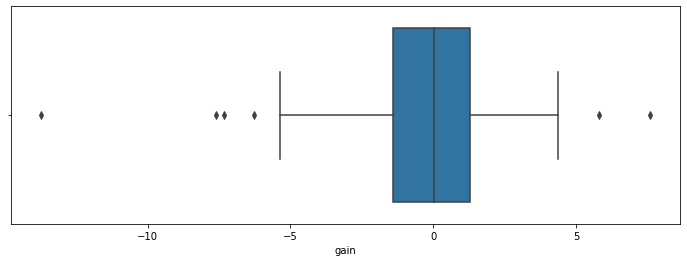

In [17]:
#Drawing a box plot for ACC Cement shows some outliers

plt.figure(figsize=(12,4))
sn.boxplot(x = acc_df.gain, orient = 'h' );

# Find outliers

## Median, IQR, min and max values
The range is that is less sensitive to outliers is the interquartile range. The interquartile range is calculated by subtracting the first quartile from the third quartile:

IQR = Q3 – Q1

Though it's not often affected much by them, the interquartile range can be used to detect outliers. This is done using these steps:

Calculate the interquartile range for the data.
Multiply the interquartile range (IQR) by 1.5 (a constant used to discern outliers).
Add 1.5 x (IQR) to the third quartile. Any number greater than this is a suspected outlier.
Subtract 1.5 x (IQR) from the first quartile. Any number less than this is a suspected outlier.


In [18]:
acc_df.gain.median()

0.014636998761003144

In [19]:
acc_stats = acc_df.gain.describe()
acc_stats

count    140.000000
mean      -0.230516
std        2.523802
min      -13.731999
25%       -1.405271
50%        0.014637
75%        1.303524
max        7.590196
Name: gain, dtype: float64

In [20]:
from scipy import stats

In [21]:
acc_iqr = stats.iqr(acc_df.gain)
acc_iqr

2.708795011882345

In [23]:
acc_min_gain = acc_stats['25%'] - 1.5 * acc_iqr
acc_max_gain = acc_stats['75%'] + 1.5 * acc_iqr

In [24]:
acc_min_gain, acc_max_gain

(-5.468463150274877, 5.366716897254505)

Outliers for ACC Cement


---



In [25]:
acc_df[acc_df.gain > acc_max_gain]

,Close Price,Open Price,gain
Date,,,
2022-09-12,2502.70,2365.0,5.822410
2022-09-14,2743.55,2550.0,7.590196


Outliers for Cipla

In [26]:
from scipy import stats
cipla_stats = cipla_df.gain.describe()
cipla_iqr = stats.iqr(cipla_df.gain)
cipla_min_gain = cipla_stats['25%'] - 1.5 * cipla_iqr
cipla_max_gain = cipla_stats['75%'] + 1.5 * cipla_iqr
cipla_df[cipla_df.gain > cipla_max_gain]

,Close Price,Open Price,gain
Date,,,
2022-09-20,1091.40,1037.00,5.245902
2022-09-27,1100.90,1068.20,3.061224
2022-12-21,1127.55,1091.05,3.345401


Outliers for Infy

In [31]:
infy_stats = infy_df.gain.describe()
infy_iqr = stats.iqr(infy_df.gain)
infy_iqr

1.5813267242556917

In [34]:
infy_min_gain = infy_stats['25%'] - 1.5 * infy_iqr
infy_max_gain = infy_stats['75%'] + 1.5 * infy_iqr
infy_min_gain

-3.2704146854796505

In [36]:
max(infy_df.gain)

2.8047091412742384

In [32]:
from scipy import stats
infy_stats = infy_df.gain.describe()
infy_iqr = stats.iqr(infy_df.gain)
infy_min_gain = infy_stats['25%'] - 1.5 * infy_iqr
infy_max_gain = infy_stats['75%'] + 1.5 * infy_iqr
infy_df[infy_df.gain > infy_max_gain]

,Close Price,Open Price,gain
Date,,,


Outliers for ITC

In [37]:
from scipy import stats
itc_stats = itc_df.gain.describe()
itc_iqr = stats.iqr(itc_df.gain)
itc_min_gain = itc_stats['25%'] - 1.5 * itc_iqr
itc_max_gain = itc_stats['75%'] + 1.5 * itc_iqr
itc_df[itc_df.gain > itc_max_gain]

,Close Price,Open Price,gain
Date,,,
2022-12-26,334.55,325.35,2.827724
2023-02-02,378.60,360.75,4.948025
2023-02-14,386.50,374.25,3.273213


Outliers for Reliance

In [38]:
from scipy import stats
reliance_stats = reliance_df.gain.describe()
reliance_iqr = stats.iqr(reliance_df.gain)
reliance_min_gain = reliance_stats['25%'] - 1.5 * reliance_iqr
reliance_max_gain = reliance_stats['75%'] + 1.5 * reliance_iqr
reliance_df[reliance_df.gain > reliance_max_gain]

,Close Price,Open Price,gain
Date,,,
2022-11-28,2708.05,2601.35,4.101716


## 3. Sectoral Indexes

For this analysis, we are comparing daily movement of the following stocks with the sensex.
   - Acc
   - Cipla
   - ITC
   - Infy
   - Reliance

### 3.a. Defining a method to load data and calculate gains

- Pass the file name and it will return a dataframe with daily open and close price and gain percentage 

In [39]:
infy_df['gain']

Date
2022-09-01   -0.040956
2022-09-02   -1.831081
2022-09-05    0.678842
2022-09-06   -0.424207
2022-09-07    1.095700
                ...   
2023-03-16   -0.502370
2023-03-17   -0.570329
2023-03-20   -1.057231
2023-03-21   -0.908249
2023-03-22   -0.895150
Name: gain, Length: 140, dtype: float64

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

    # Read the csv file
sensex_df = pd.read_csv("https://raw.githubusercontent.com/shivdeepnv/MachineLearningWithPython/main/Session_2/sensex_daily.csv", index_col = False, parse_dates=['Date'])
    # Set the time index 
sensex_df = sensex_df.set_index(['Date'], drop=True)

    # Sort the records based on time
sensex_df.sort_index(ascending = True, inplace=True)

    # Select only Close and Open Price columns for further analysis
sensex_df['gain'] = ((sensex_df['Close'] - sensex_df['Open']) * 100 /
                    sensex_df['Open'])
sensex_df[['Close', 'Open', 'gain']]

,Close,Open,gain
Date,,,
2022-09-01,58766.59,58710.53,0.095485
2022-09-02,58803.33,58969.02,-0.280978
2022-09-05,59245.98,58814.08,0.734348
2022-09-06,59196.99,59285.36,-0.149059
2022-09-07,59028.91,58789.26,0.407642
...,...,...,...
2023-03-16,57634.84,57510.80,0.215681
2023-03-17,57989.90,58038.17,-0.083169
2023-03-20,57628.95,57773.55,-0.250288


### Add gain of various sectors as columns to the sensex dataframe

In [42]:
sensex_df['acc_gain'] = acc_df['gain']
sensex_df['cipla_gain'] = cipla_df['gain']
sensex_df['itc_gain'] = itc_df['gain']
sensex_df['infy_gain'] = infy_df['gain']
sensex_df['reliance_gain'] = reliance_df['gain']

In [44]:
sensex_df

,Open,High,Low,Close,gain,acc_gain,cipla_gain,itc_gain,infy_gain,reliance_gain
Date,,,,,,,,,,
2022-09-01,58710.53,59309.79,58522.57,58766.59,0.095485,-0.165146,-0.824202,-0.548074,-0.040956,-1.116218
2022-09-02,58969.02,59108.66,58558.64,58803.33,-0.280978,-0.389554,-0.708838,1.508485,-1.831081,-1.372320
2022-09-05,58814.08,59308.25,58812.20,59245.98,0.734348,-0.331010,0.416075,1.340937,0.678842,1.590909
2022-09-06,59285.36,59566.67,58974.26,59196.99,-0.149059,1.921776,1.467362,-0.758380,-0.424207,1.004047
2022-09-07,58789.26,59166.46,58722.89,59028.91,0.407642,3.711047,1.204123,-0.030665,1.095700,0.056208
...,...,...,...,...,...,...,...,...,...,...
2023-03-16,57510.80,57887.46,57158.69,57634.84,0.215681,0.732590,0.637668,0.659631,-0.502370,-0.491719
2023-03-17,58038.17,58178.94,57503.90,57989.90,-0.083169,-2.602817,-1.426236,-2.148438,-0.570329,-1.153846
2023-03-20,57773.55,57829.23,57084.91,57628.95,-0.250288,-1.563225,-0.806359,1.910400,-1.057231,-0.962663


## Correlation?

Correlation measures the extent to which two variables are linearly related (meaning they change together at a constant rate).

- We can observe the correlation using **scatter plot**.

<img src="https://github.com/manaranjanp/MLCourseV1/blob/main/Session_2/correlation.png?raw=1" alt="Nowmal Distribution" width="600"/>

Source: *https://www.investopedia.com/ask/answers/032515/what-does-it-mean-if-correlation-coefficient-positive-negative-or-zero.asp*

### Scatter Plot between Sensex and the stocks we are analysing

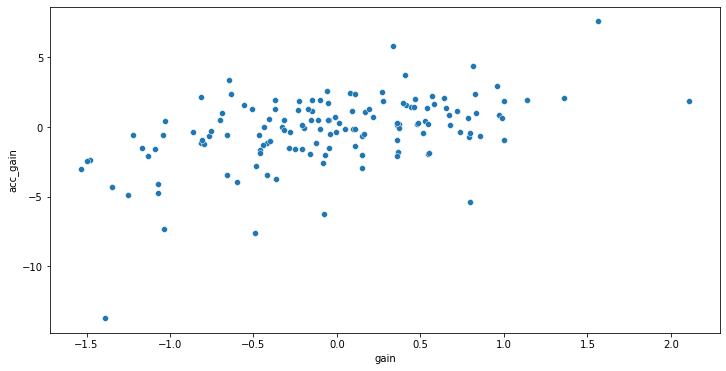

In [46]:
# ACC
plt.figure(figsize=(12, 6))
sn.scatterplot(data = sensex_df, x = 'gain', y = 'acc_gain');

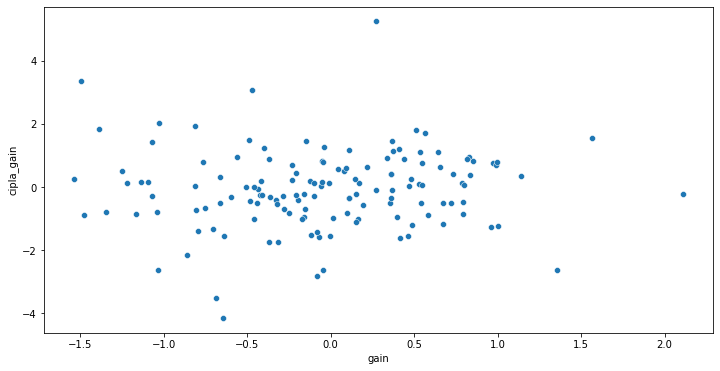

In [47]:
#Cipla
plt.figure(figsize=(12, 6))
sn.scatterplot(data = sensex_df, x = 'gain', y = 'cipla_gain');

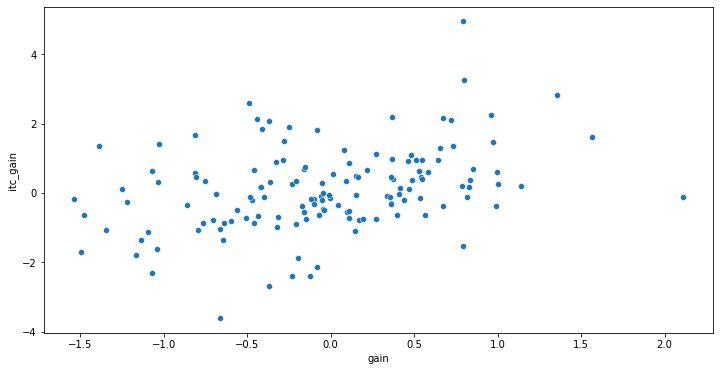

In [48]:
# itc
plt.figure(figsize=(12, 6))
sn.scatterplot(data = sensex_df, x = 'gain', y = 'itc_gain');

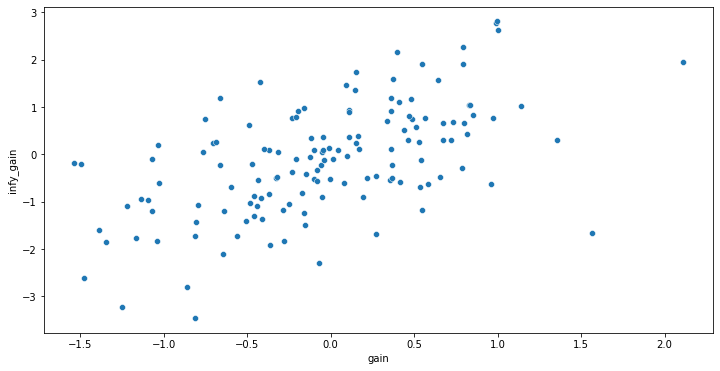

In [49]:
#Infy
plt.figure(figsize=(12, 6))
sn.scatterplot(data = sensex_df, x = 'gain', y = 'infy_gain');

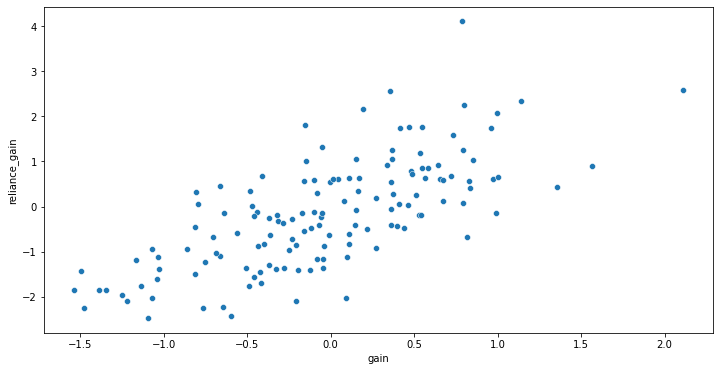

In [50]:
#Reliance
plt.figure(figsize=(12, 6))
sn.scatterplot(data = sensex_df, x = 'gain', y = 'reliance_gain');


## 6. Strength of Correlation 

We describe correlations with a unit-free measure called the correlation coefficient which ranges from -1 to +1. The correlation is denoted by **r**.

- The closer the correlation is to zero, the weaker the linear relationship.
- Positive correlation values indicate a positive correlation, where the values of both variables tend to increase together.
- Negative correlation values indicate a negative correlation, where the values of one variable tend to increase when the values of the other variable decrease.

Source: https://www.jmp.com/en_in/statistics-knowledge-portal/what-is-correlation.html


Correlation is given by:

$$\frac{{}\sum_{i=1}^{n} (x_i - \overline{x})(y_i - \overline{y})}
{\sigma_{x}\sigma_{y}}$$

This is also known as **Pearson Correlation**.

- | r | < 0.25 - No relationship
- 0.25 < | r | < 0.5 - Weak relationship
- 0.5 < | r | < 0.75 - Moderate relationship
- | r | > 0.75 - Strong relationship

The definition of a “weak” correlation can vary from domain to domain. Check the link below:
   - https://www.statology.org/what-is-a-weak-correlation/

### 6.a. Creating a Heatmap

In [51]:
sector_corr = sensex_df[['gain', 
                         'acc_gain', 
                         'cipla_gain',
                         'itc_gain',
                         'infy_gain'
                         ,'reliance_gain']].corr()
sector_corr

,gain,acc_gain,cipla_gain,itc_gain,infy_gain,reliance_gain
gain,1.000000,0.488277,0.060674,0.356556,0.569338,0.710140
acc_gain,0.488277,1.000000,0.063665,-0.017603,0.129607,0.381659
cipla_gain,0.060674,0.063665,1.000000,-0.012298,0.083369,0.035888
itc_gain,0.356556,-0.017603,-0.012298,1.000000,0.062616,0.267487
infy_gain,0.569338,0.129607,0.083369,0.062616,1.000000,0.317556
reliance_gain,0.710140,0.381659,0.035888,0.267487,0.317556,1.000000


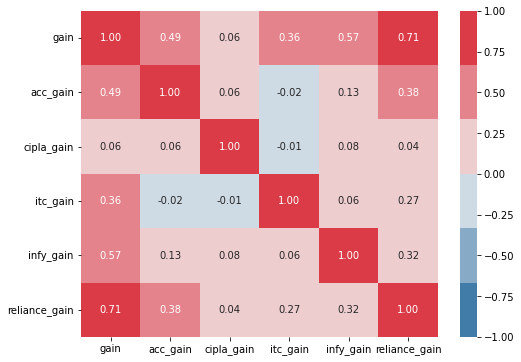

In [52]:
plt.figure(figsize=(8, 6))
sn.heatmap(sector_corr,
           annot = True,
           fmt = "0.2f",
           cmap = sn.diverging_palette(240, 10),
           vmin = -1.0, 
           vmax = 1.0);